<a href="https://colab.research.google.com/github/Saiful-Bahri-Irfanto/Machine-Learning/blob/master/Back_propagation_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sumber **(https://www.kaggle.com/andreicosma/back-propagation-neural-network)**

Import library sng dibutuhno

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Load data dari google drive, dataset nya simpan dulu ke google drive terus di panggil nanti

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Pastikan direktori datset nya sama contoh aku simpan datasetnya di drive google aku buat folder dengan nama analisis data, terus di dalam anaisis data ada folder dataset, nah di dalam folder dataset tersebut baru ada dataset yang digunakan untuk project ini

In [ ]:
db = pd.read_csv("/content/drive/My Drive/analis data/dataset/duke-breast-cancer.txt", sep = "\t")
db.head()


,1,-0.362772,-0.314085,-0.177185,0.89865,-0.154588,-0.217807,0.410032,-0.106035,2.09458,-0.120402,-0.227627,-0.611535,0.456636,0.409078,-0.275131,-0.194476,0.083471,-0.399868,-0.299734,-0.499663,-0.449116,0.014423,-0.263376,-0.228857,-0.365664,0.235682,-0.858571,-0.371278,-0.489651,1.43927,-0.207108,-0.241611,0.319242,-0.534551,-0.497377,-0.056419,-0.792793,0.008452,-0.722719,...,-0.222273,0.079099,0.12378,-0.250833,0.808906,0.264752,-0.641295,-0.146375,0.250552,-1.15369,0.109339,-0.21984,0.135802,1.16252,-0.506647,-0.21552,-0.161985,-0.270079,-0.038109,0.545737,-0.030848,-0.131192,0.37993,0.067359,0.347915,-0.05617,-0.260292,0.3255,-0.153237,0.560396,0.352048,-0.163001,0.050292,0.471149,0.241524,0.068197,-0.009899,0.343084,-1.24348,1.80402
0,1,-0.459580,-0.719855,-1.005840,-0.902675,-0.657600,-0.592310,0.233404,-0.745314,-0.736191,-0.722748,-0.532631,-0.019970,-0.027846,-0.856911,1.377600,-0.036926,-0.245902,-0.289624,-0.524521,-0.696216,-0.589519,0.169156,1.069250,-0.260436,-0.538246,-0.539099,0.469226,0.195402,0.518308,-0.392350,-0.167847,-0.707957,-0.835457,0.362133,-0.444962,-0.126178,0.347473,1.777980,-0.778002,...,-0.488066,-0.166436,-0.304630,-0.538749,-1.481340,-0.049541,-0.174811,-0.255201,-0.551215,0.284865,-0.101783,-0.415393,-0.654582,5.769090,-0.355934,-0.740597,-0.542211,-0.552544,-0.067350,0.484912,-0.678985,-0.614250,-0.098147,-0.717096,-0.375175,-0.679817,-0.397442,-1.158800,-0.598238,0.070776,0.224620,-0.003717,-0.405143,0.251173,0.368900,-0.312117,-0.573882,-0.729734,-0.639368,0.344724
1,1,0.103909,-0.296076,-0.165474,0.044957,-0.089225,-0.380194,0.249268,-0.219473,-0.343635,0.600622,-0.080622,0.181226,0.162455,-0.511097,1.241950,-0.013042,-0.083209,-0.362484,-0.028900,-0.457592,-0.484332,-0.296829,0.107685,0.037133,-0.127737,-0.049854,-0.593527,-0.878698,0.435926,0.245502,-0.625318,-0.117213,0.621393,-0.794839,-0.831591,0.838897,-0.228268,0.075216,-0.081244,...,-0.134623,-0.472963,0.260643,-0.086674,0.370911,0.043302,0.999930,-0.327108,0.169201,0.123854,-0.119601,-0.136502,-0.085859,0.497591,-0.340138,0.120833,0.075918,0.370708,0.164324,0.490828,0.017628,0.035919,0.026320,0.171399,-0.195496,0.025022,0.130956,0.713825,-0.066845,0.179875,0.388621,-0.488521,-0.405670,0.346316,-0.044239,0.095011,0.430106,0.181200,-0.626812,0.237308
2,0,-0.110728,-0.147049,-0.402544,-0.148652,-0.112891,-0.047957,0.132846,0.064040,-0.319076,0.923248,-0.011552,-0.263451,-0.350887,-0.679302,0.457169,-0.620489,0.499716,-0.324323,-0.167195,-0.595894,-0.202526,-0.043874,0.164872,-0.262141,-0.225273,-0.382358,1.466430,-0.397152,-0.240803,0.030311,-0.595990,-0.888365,0.322103,0.756694,-1.006570,-0.593973,-0.564075,-0.995814,-0.435999,...,0.232984,-0.595563,0.685015,0.324595,-0.382599,-0.413532,0.400038,0.301978,-0.984536,0.586596,0.362638,-0.033752,0.082420,-0.058723,-0.272900,0.051017,0.203256,-0.081056,0.159498,0.315275,0.106651,-0.183165,-0.422182,0.582537,0.591026,0.280486,0.532511,-0.446665,-0.602023,-0.235652,0.419011,-0.362254,-0.077094,0.517718,-0.591872,0.063579,-0.094244,0.731982,-1.464370,0.905178
3,0,0.332963,1.002860,0.803334,-0.431752,1.479780,0.130415,0.323632,0.472668,0.237987,0.706464,0.490895,0.410346,-0.031808,-1.110020,-0.616352,-0.252793,0.393914,0.286964,0.922988,0.099361,0.745967,-0.087043,0.556089,0.091012,-0.136108,-1.115780,-0.515446,-0.366578,0.519239,1.038630,-0.279246,-0.741718,1.137660,-1.616480,0.498838,-0.511916,0.350491,1.369830,1.127860,...,1.258130,0.317853,1.094880,0.459950,1.184390,0.936568,1.202350,0.919205,-0.023758,0.585960,0.521507,0.328081,1.350300,-0.144284,0.528373,0.349557,0.726116,1.233530,1.063070,-0.326382,0.853327,1.244250,0.576107,0.720982,1.785740,1.530860,0.167558,1.965730,-1.175750,-0.052883,1.117700,-0.099333,0.491889,2.226070,-0.415884,0.284093,1.911490,1.815050,-0.559660,-0.699785
4,0,-0.237573,-0.429426,0.841753,-0.785126,0.463096,-0.133755,0.688543,-0.172954,-0.561986,-0.702004,-0.114303,-0.415897,0.183255,-0.354275,-0.407550,-0.457968,0.096522,-0.255143,-0.140487,-0.479721,-0.2

In [ ]:
db = np.loadtxt("/content/drive/My Drive/analis data/dataset/duke-breast-cancer.txt")
print("Database raw shape (%s,%s)" % np.shape(db))

Database raw shape (86,7130)


In [ ]:
np.random.shuffle(db)
y = db[:, 0]
x = np.delete(db, [0], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(np.shape(x_train),np.shape(x_test))

(77, 7129) (9, 7129)


In [ ]:
hidden_layer = np.zeros(72)
weights = np.random.random((len(x[0]), 72))
output_layer = np.zeros(2)
hidden_weights = np.random.random((72, 2))

Selanjutnya mengimplementasikan :
- Sum function
- Activation function
- SoftMax function
- Recalculate Weights function
- Back-propagation function

**Sum function**

---


s_i is the sum for [i]th perceptron from the layer.

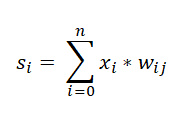

In [ ]:
def sum_function(weights, index_locked_col, x):
    result = 0
    for i in range(0, len(x)):
        result += x[i] * weights[i][index_locked_col]
    return result

**Activation function**

---


g(s_i) is the activation for the [i]th perceptron from the layer.


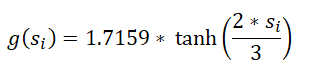

In [ ]:
def activate_layer(layer, weights, x):
    for i in range(0, len(layer)):
        layer[i] = 1.7159 * np.tanh(2.0 * sum_function(weights, i, x) / 3.0)

**SoftMax function**

---


The softmax function, or normalized exponential function, is a generalization of the logistic function that "squashes" a K-dimensional vector z of arbitrary real values to a K-dimensional vector σ ( z ) of real values in the range (0, 1) that add up to 1.

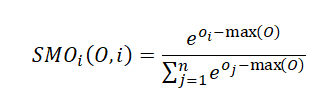


In [ ]:
def soft_max(layer):
    soft_max_output_layer = np.zeros(len(layer))
    for i in range(0, len(layer)):
        denominator = 0
        for j in range(0, len(layer)):
            denominator += np.exp(layer[j] - np.max(layer))
        soft_max_output_layer[i] = np.exp(layer[i] - np.max(layer)) / denominator
    return soft_max_output_layer

**Recalculate weights function**

---


Here we tune the network weights and hidden weights matrix. We are going to use this inside the back propagation function.

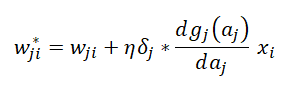

In [ ]:
def recalculate_weights(learning_rate, weights, gradient, activation):
    for i in range(0, len(weights)):
        for j in range(0, len(weights[i])):
            weights[i][j] = (learning_rate * gradient[j] * activation[i]) + weights[i][j]

**Back-propagation functio**n

---


In this function we find out the output layer gradient and the hidden layer gradient to recalculate the network weights. Output gradient formula

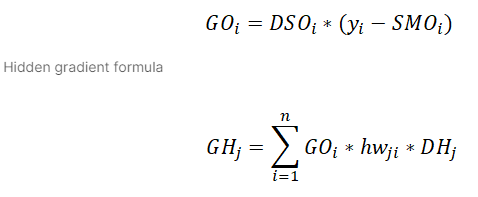

In [ ]:
def back_propagation(hidden_layer, output_layer, one_hot_encoding, learning_rate, x):
    output_derivative = np.zeros(2)
    output_gradient = np.zeros(2)
    for i in range(0, len(output_layer)):
        output_derivative[i] = (1.0 - output_layer[i]) * output_layer[i]
    for i in range(0, len(output_layer)):
        output_gradient[i] = output_derivative[i] * (one_hot_encoding[i] - output_layer[i])
    hidden_derivative = np.zeros(72)
    hidden_gradient = np.zeros(72)
    for i in range(0, len(hidden_layer)):
        hidden_derivative[i] = (1.0 - hidden_layer[i]) * (1.0 + hidden_layer[i])
    for i in range(0, len(hidden_layer)):
        sum_ = 0
        for j in range(0, len(output_gradient)):
            sum_ += output_gradient[j] * hidden_weights[i][j]
        hidden_gradient[i] = sum_ * hidden_derivative[i]
    recalculate_weights(learning_rate, hidden_weights, output_gradient, hidden_layer)
    recalculate_weights(learning_rate, weights, hidden_gradient, x)

In [ ]:
one_hot_encoding = np.zeros((2,2))
for i in range(0, len(one_hot_encoding)):
    one_hot_encoding[i][i] = 1
training_correct_answers = 0
for i in range(0, len(x_train)):
    activate_layer(hidden_layer, weights, x_train[i])
    activate_layer(output_layer, hidden_weights, hidden_layer)
    output_layer = soft_max(output_layer)
    training_correct_answers += 1 if y_train[i] == np.argmax(output_layer) else 0
    back_propagation(hidden_layer, output_layer, one_hot_encoding[int(y_train[i])], -1, x_train[i])
print("MLP Correct answers while learning: %s / %s (Accuracy = %s) on %s database." % (training_correct_answers, len(x_train), 
                                                                                       training_correct_answers/len(x_train),"Duke breast cancer"))

MLP Correct answers while learning: 58 / 77 (Accuracy = 0.7532467532467533) on Duke breast cancer database.


Keakuratan tes tergantung pada matriks bobot yang dihasilkan secara acak dan tingkat pembelajaran. Menggunakan tingkat dan bobot pembelajaran yang berbeda akan menghasilkan akurasi yang berbeda.

**pokok e tiap kali di running hasil e beda2**

In [ ]:
testing_correct_answers = 0
for i in range(0, len(x_test)):
    activate_layer(hidden_layer, weights, x_test[i])
    activate_layer(output_layer, hidden_weights, hidden_layer)
    output_layer = soft_max(output_layer)
    testing_correct_answers += 1 if y_test[i] == np.argmax(output_layer) else 0
print("MLP Correct answers while testing: %s / %s (Accuracy = %s) on %s database" % (testing_correct_answers, len(x_test),
                                                                                     testing_correct_answers/len(x_test), "Duke breast cancer"))

MLP Correct answers while testing: 5 / 9 (Accuracy = 0.5555555555555556) on Duke breast cancer database


Pada set pengujian ini, akurasi dapat mencapai bahkan 100% dengan jumlah tepat perceptron tersembunyi di lapisan tersembunyi. Dalam contoh ini, kami menggunakan tingkat pembelajaran [-1] dengan total [72] perceptron tersembunyi di lapisan tersembunyi.

**Kesimpulan**

---


Dalam tes ini, kami telah menunjukkan bahwa jaringan saraf back-propagation berkinerja baik pada set data yang besar. Kinerja dapat ditingkatkan dengan mengubah jumlah neuron tersembunyi dan tingkat pembelajaran. Karena pelatihan iteratif dan pelatihan berbasis gradien, kecepatan umum jauh lebih lambat dari yang dibutuhkan, sehingga dibutuhkan banyak waktu untuk berlatih pada kumpulan data yang sangat besar. Kami tidak dapat mengatakan bahwa ada jaringan yang sempurna untuk setiap jenis basis data di luar sana. Jadi, terus uji data Anda di beberapa jaringan saraf dan lihat apa yang paling cocok.